# Daily Challenge: Mastering Data Visualization

## Your Task

* Dataset: Use the ‘Iris’ dataset available in seaborn (use `seaborn.load_dataset('iris')`).
* Matplotlib Task: Generate a histogram for petal lengths.
* Seaborn Task: Produce a pair plot to show pairwise relationships in the dataset.

**optional** :

* Plotnine Task: Create a scatter plot of sepal length vs. sepal width, color-coded by species.
* Plotly Task: Create an interactive 3D scatter plot mapping sepal length, sepal width, and petal length, color-coded by species.

Each plot should be well-labeled with appropriate titles and axis labels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from plotnine import *

import plotly.express as px

In [2]:
df = sns.load_dataset('iris')

print("### Dataset Preview")
display(df.head())
print("\n### Dataset Information")
df.info()
print("\n### Dataset Summary Statistics")
display(df.describe())

### Dataset Preview


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



### Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

### Dataset Summary Statistics


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


No missing values, the only qualitetive variable is `species`

In [3]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


We see there are three different species: setosa, versicolr and virginica.

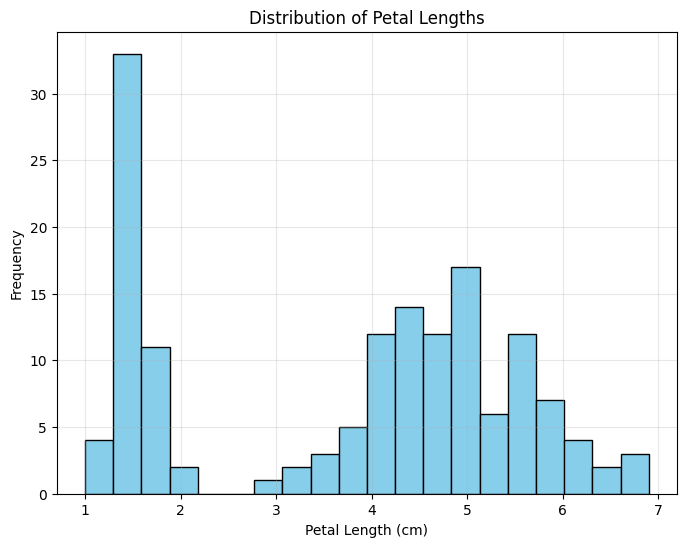

In [4]:
plt.figure(figsize=(8, 6))
plt.hist(df['petal_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Petal Lengths')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.grid(alpha=0.3)
plt.show()

Due the `species`, the petal length distribution is a bimodal.

<Figure size 1000x800 with 0 Axes>

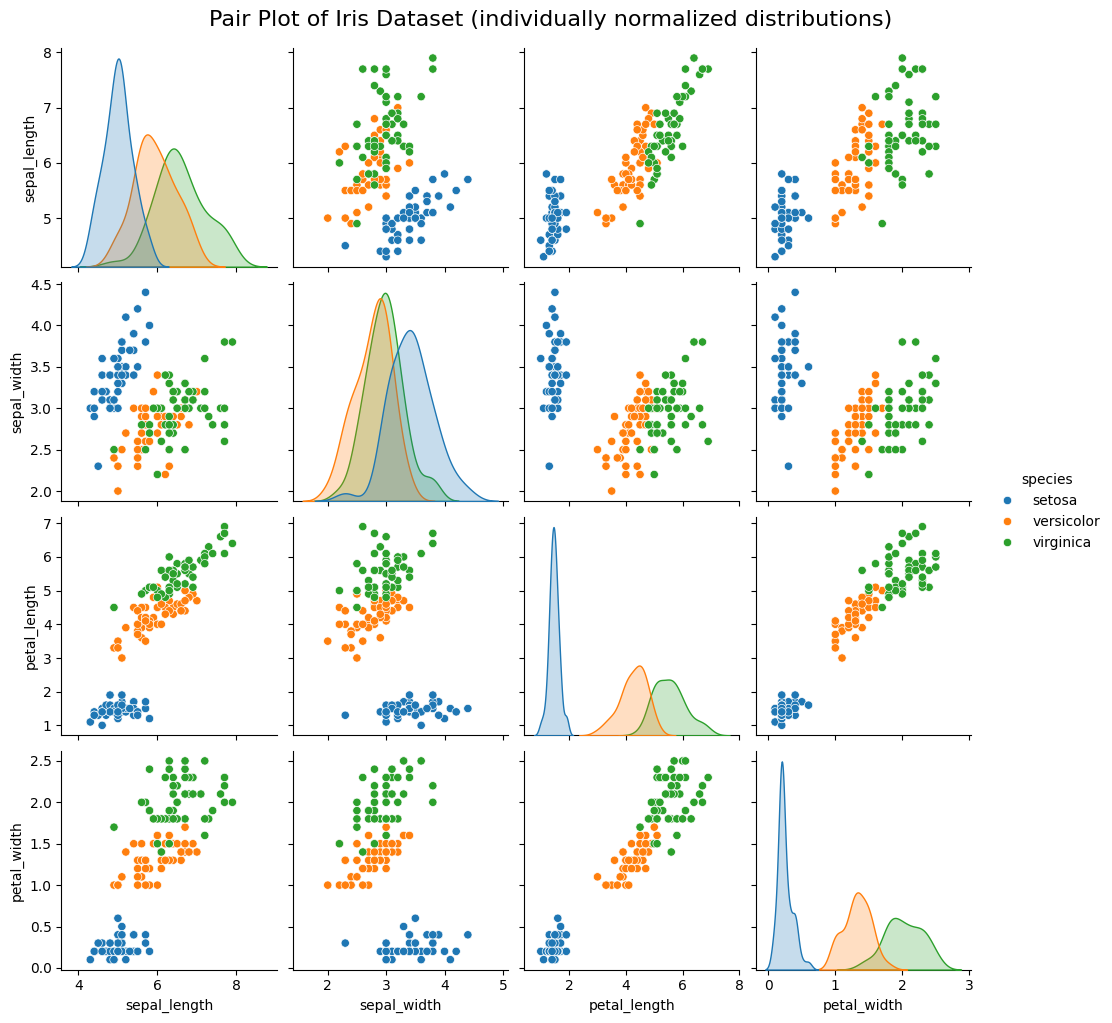

In [5]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species', diag_kind='kde', diag_kws={'common_norm':False})
plt.suptitle('Pair Plot of Iris Dataset (individually normalized distributions)', y=1.02, fontsize=16)
plt.show()

Each species presents its own distributions (hence the bimodal we observed in the histogram for petal lengths).

**sepal length**: Setosa has a bigger kurtosis and the distribution is located in a smaller range than the other two.

**sepal width**: The distributions are fairly similar, but setosa's range is displaced to the right, i.e. wider sepals.

**petal length & petal width**: Setosa's distribution is much more concentrated (higher kurtosis), shifted to the left, and doesn't overlap with the others. Virginica's range is the most right-shifted, indicating larger petals.

In general, for all size-related variables, we can observe that versicolor and virginica show similar patterns in how their features relate to size, though they are distinct from each other.

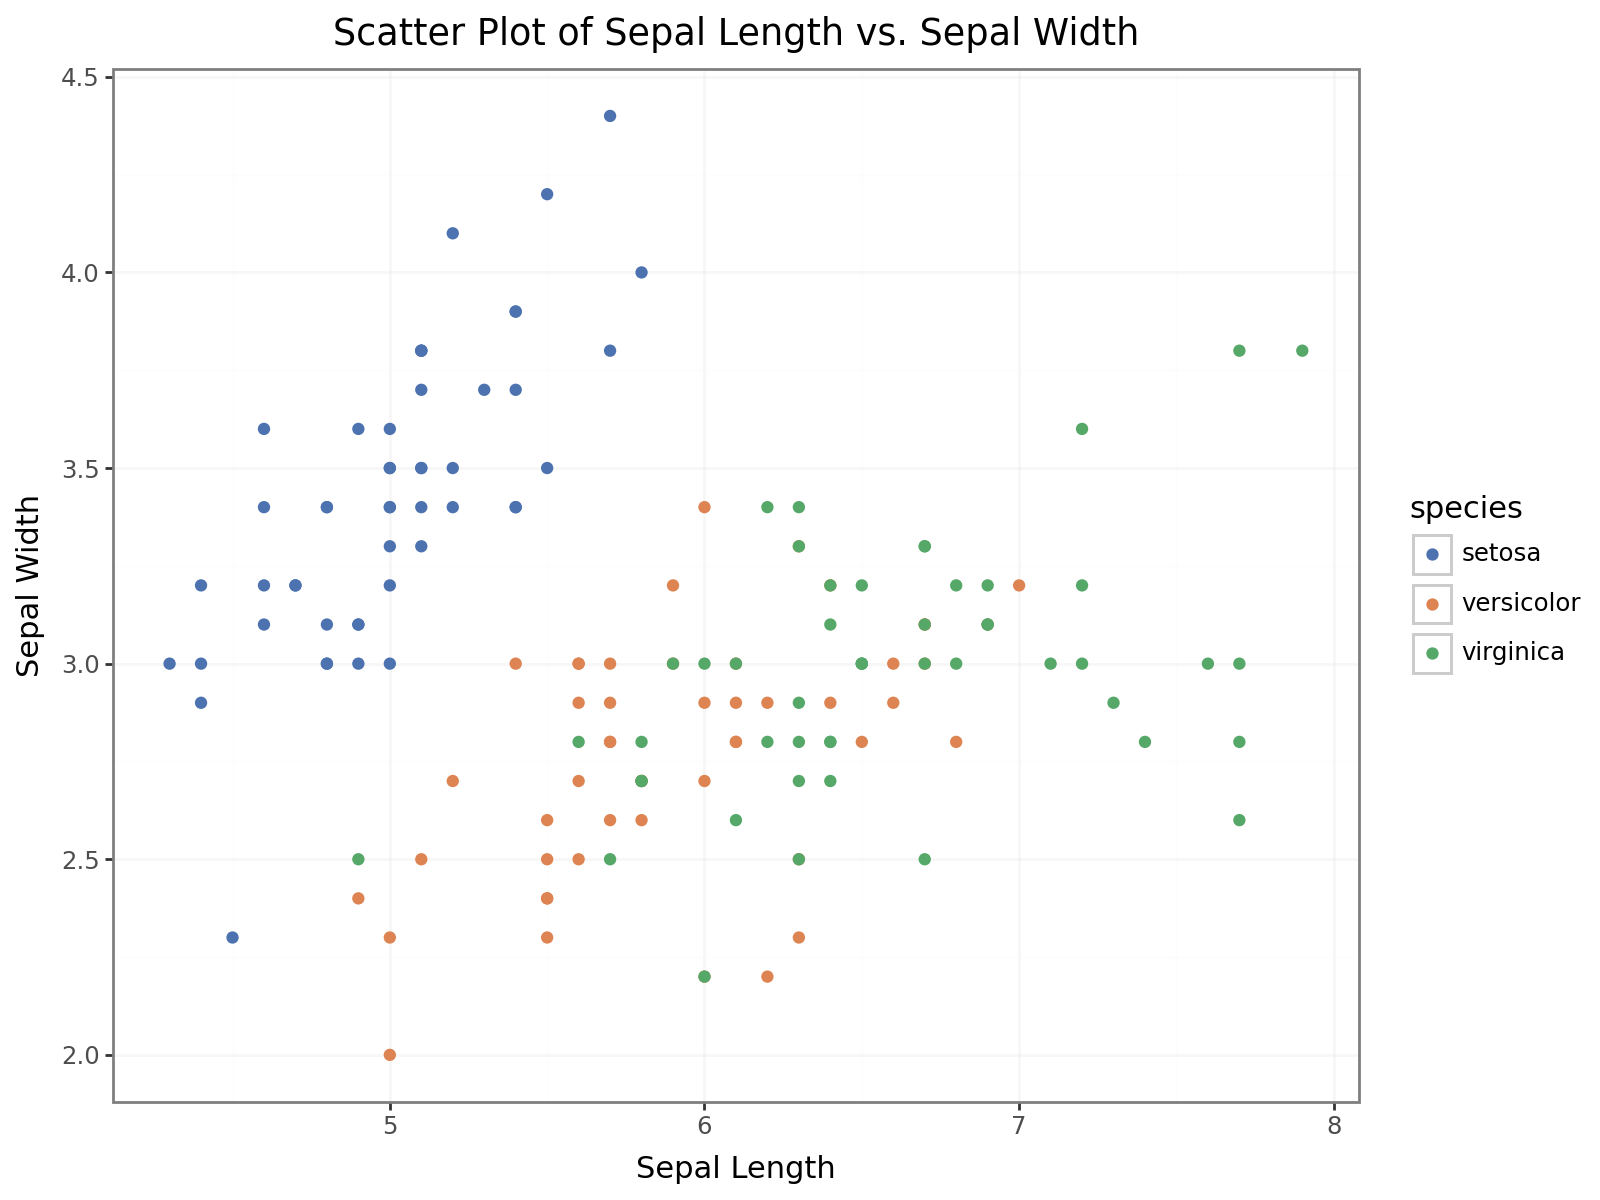

In [6]:
plot = (ggplot(df, aes(x='sepal_length', y='sepal_width', color='species'))
 + geom_point()  # need adding scatter plot geometry
 + labs(title="Scatter Plot of Sepal Length vs. Sepal Width",
        x="Sepal Length", y="Sepal Width")
#  + theme_minimal()
 + theme_bw()
 + theme(figure_size=(8, 6),
         panel_grid_major=element_line(alpha=0.3),  # adjust grid alpha here
         panel_grid_minor=element_line(alpha=0.3)  # adjust grid alpha here
         )
#  + scale_color_discrete(name="Species")
 + scale_color_manual(values={'setosa': '#4C72B0',
                               'versicolor': '#DD8452',
                               'virginica': '#55A868'})  # homologate color scheme
 )

plot

The scatter plot reveals distinct patterns for the three Iris species. There are two fairly linear trends visible: one for setosa, and another shared by versicolor and virginica. For all three species, sepal width is positively correlated with sepal length. Setosa forms a clearly separate cluster, with generally shorter but wider sepals compared to the other species. Its trend has a steeper slope, indicating a stronger correlation between sepal width and length. Versicolor and virginica share a similar trend with more elongated sepals, but their clusters overlap considerably, making them harder to distinguish based solely on these measurements.

In [7]:
fig = px.scatter_3d(df,
                    x='sepal_length',
                    y='sepal_width',
                    z='petal_length',
                    color='species',
                    title='3D Scatter Plot of Iris Dataset',
                    labels={'sepal_length': 'Sepal Length (cm)',
                            'sepal_width': 'Sepal Width (cm)',
                            'petal_length': 'Petal Length (cm)'},
                    color_discrete_map={'setosa': '#4C72B0', # homologate color scheme
                                        'versicolor': '#DD8452',
                                        'virginica': '#55A868'})
fig.show()

In the 3D scatter plot of sepal length, sepal width, and petal length, we see essentially a summary of the pairplot we saw before: two clear different trends (one for setosa, and the other shared by versicolor & virginica). However, in this plot - although we have two trends, we can distinguish three different clusters since versicolor and virginica show minimal overlap in three-dimensional space.

---

## Conclusions:

The Iris setosa species is distinctly different from Iris versicolor and Iris virginica in several key aspects:

1. Petal Characteristics: Setosa has significantly smaller petals (both in length and width) compared to the other two species. Its petal measurements show a concentrated distribution that doesn't overlap with versicolor or virginica.
2. Sepal Characteristics: While setosa's sepal length is generally shorter, it tends to have wider sepals compared to the other species. The sepal length-to-width ratio for setosa shows a steeper correlation than for versicolor and virginica.
3. Distribution Patterns: Setosa consistently shows more peaked (higher kurtosis) distributions across measurements, indicating less variability within the species.
4. Cluster Separation: In both 2D and 3D visualizations, setosa forms a clearly separate cluster from the other two species.

Versicolor and virginica, while distinct, share more similarities with each other than with setosa. They have overlapping characteristics in 2D representations but become more distinguishable in a 3D space representation of their dimensions.

The bimodal distribution observed in petal length across all species is primarily due to the significant difference between setosa and the other two species.

These findings suggest that setosa could be easily identified based on its floral measurements, while distinguishing between versicolor and virginica may require more detailed analysis or additional features.